In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [12]:
  df = pd.read_excel("/content/diabetes.xlsx")

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
x=df.drop("Outcome",axis=1)

In [19]:
y=df["Outcome"]

In [20]:
x.shape[1]

8

In [21]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
input_layer=keras.Input(shape=[x.shape[1]])

In [23]:
hidden_layer1=Dense(10,activation="relu")

In [24]:
hidden_layer1=hidden_layer1(input_layer)

In [25]:
hidden_layer2=Dense(4,activation="relu")

In [26]:
hidden_layer2=hidden_layer2(hidden_layer1)

In [27]:
output_layer=Dense(1,activation="sigmoid")

In [28]:
output_layer=output_layer(hidden_layer2)

In [31]:
model=keras.Model(inputs=input_layer,outputs=output_layer)

In [32]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
keras_earlystop=keras.callbacks.EarlyStopping(monitor="loss",mode="min",patience=5)

In [34]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [35]:
model.fit(x_tr,y_tr,epochs=100,callbacks=[keras_earlystop])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5339 - loss: 1.8563
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 1.1904 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4986 - loss: 0.9946 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5217 - loss: 0.9259 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5418 - loss: 0.8608 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5844 - loss: 0.7861 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5420 - loss: 0.7994 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5871 - loss: 0.7436 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6003 - loss: 0.7342 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6530 - loss: 0.6901 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5965 - loss: 0.6949 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [36]:
model.evaluate(x_tr,y_tr)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6466 - loss: 0.6325


[0.6115193963050842, 0.6840391159057617]

In [38]:
p_tr=model.predict(x_tr)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [39]:
p_test=model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [41]:
p_test[0:3]

array([[0.3444604],
       [0.3444604],
       [0.3444604]], dtype=float32)

In [42]:
p_list=[]
for i in p_test:
  if i<0.5:
    p_list.append(0)
  else:
    p_list.append(1)

In [43]:
import matplotlib.pyplot as plt

In [44]:
gr=df["Outcome"].value_counts()

In [45]:
gr

,count
Outcome,
0,500
1,268


In [46]:
colors=["green","red"]

In [47]:
labels=["Non_Diabetic","Diabetic"]

<ipython-input-48-80bb1979cf0c>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


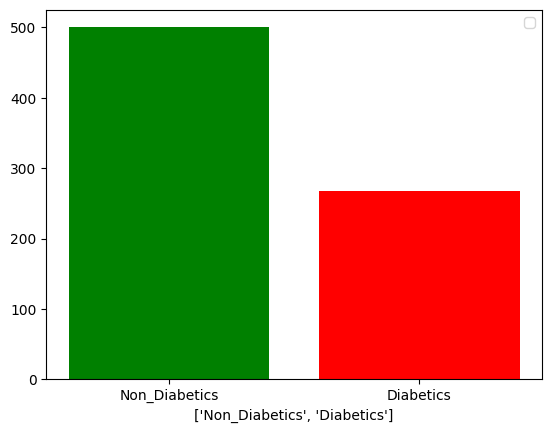

In [48]:
plt.bar(gr.index,gr.values,color=colors,tick_label=labels)
plt.xlabel(labels)
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import  classification_report,accuracy_score

In [50]:
print(classification_report(y_test,p_list))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82       100
           1       0.78      0.33      0.47        54

    accuracy                           0.73       154
   macro avg       0.75      0.64      0.65       154
weighted avg       0.75      0.73      0.70       154



In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_test,p_list)

array([[95,  5],
       [36, 18]])